# <center> Systematic Trading Strategies with Machine Learning Algorithms </center>

## <center> Optional Session - Decision Trees
</center>
<center>
<table class="tfo-notebook-buttons" style="margin-left: auto; margin-right: auto;">
  <tr>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://hm-ai.github.io/Systematic_Trading_Strategies_with_Machine_Learning_Algorithms/">
        <img src="https://drive.google.com/uc?export=view&id=1hTIoxoea8RTLgKb1oE6_PFmtTNPGs5p4" height="50"/>
        <br>Course page
      </a>
    </td>
    <td style="text-align: center; vertical-align: middle;">
      <a target="_blank" href="https://colab.research.google.com/drive/1nnX88vG1N1-pG5Hon9UcYvEU4mQbnVyY?usp=sharing">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />
        <br>Run in Google Colab
      </a>
    </td>
  </tr>
</table>
</center>

# Generating Non-Linearly Separated Data and Visualizing Decision Boundaries

## Objective
The goal of this session is to:
1. Generate a synthetic dataset with non-linear patterns to challenge traditional linear models like Logistic Regression.
2. Visualize and compare the decision boundaries of different models, such as Logistic Regression and Decision Trees, to highlight their effectiveness in handling such data.

## Non-Linearly Separated Data
We create a dataset with two concentric rings using trigonometric functions. Each ring represents a class, making the data non-linearly separable.

The dataset generation uses the following equations:
- **Inner Ring**:
  $$
  x_{\text{inner}} = \cos(\theta) + \epsilon, \quad y_{\text{inner}} = \sin(\theta) + \epsilon
  $$
  where $ \theta $ is a set of angles evenly spaced around a circle, and $ \epsilon $ is random noise added to make the data more realistic.

- **Outer Ring**:
  $$
  x_{\text{outer}} = 2 \cdot \cos(\theta) + \epsilon, \quad y_{\text{outer}} = 2 \cdot \sin(\theta) + \epsilon
  $$

The labels are:
- $ y = 0 $ for the inner ring.
- $ y = 1 $ for the outer ring.

This dataset is particularly challenging for linear models because no straight line can separate the two classes effectively.

## Visualizing Decision Boundaries
To assess the performance of models like Logistic Regression and Decision Trees, we visualize their decision boundaries. This provides insights into how well each model can classify the non-linear patterns.

### Decision Boundary Plot
The function `plot_decision_boundary` generates a visualization by:
1. Creating a grid of points over the feature space.
2. Using the model's `predict` method to classify each point on the grid.
3. Plotting the decision regions and overlaying the training data.




In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

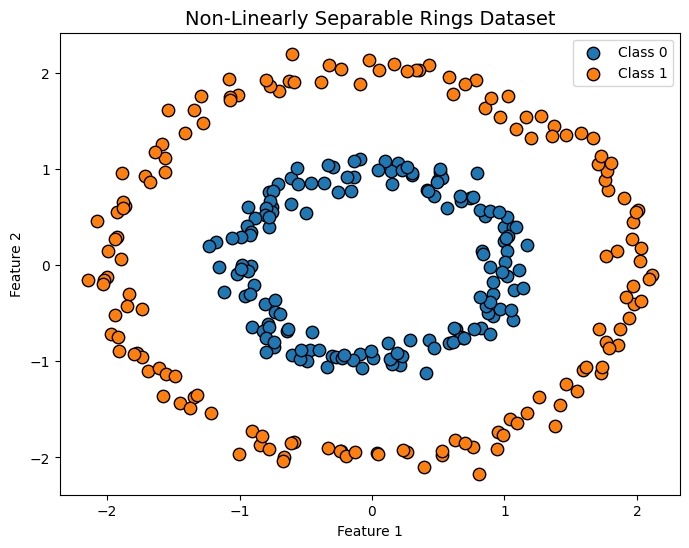

In [ ]:
# Generate non-linearly separable rings data
# ------------------------------------------
def generate_rings_data(n_samples, noise=0.01):
    """
    Generate two concentric rings of data using cosine and sine functions.

    Parameters:
    n_samples (int): Total number of samples to generate.
    noise (float): Amount of noise to add to the data.

    Returns:
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Labels (0 or 1).
    """
    n_samples_per_class = n_samples // 2

    # Inner ring
    theta_inner = np.linspace(0, 2 * np.pi, n_samples_per_class)
    x_inner = np.cos(theta_inner) + noise * np.random.randn(n_samples_per_class)
    y_inner = np.sin(theta_inner) + noise * np.random.randn(n_samples_per_class)
    labels_inner = np.zeros(n_samples_per_class)

    # Outer ring
    theta_outer = np.linspace(0, 2 * np.pi, n_samples_per_class)
    x_outer = 2 * np.cos(theta_outer) + noise * np.random.randn(n_samples_per_class)
    y_outer = 2 * np.sin(theta_outer) + noise * np.random.randn(n_samples_per_class)
    labels_outer = np.ones(n_samples_per_class)

    # Combine data
    X = np.vstack((np.column_stack((x_inner, y_inner)), np.column_stack((x_outer, y_outer))))
    y = np.hstack((labels_inner, labels_outer))

    return X, y

# Create the rings dataset
X, y = generate_rings_data(n_samples=300, noise=0.1)
y = y.astype(int)  # Convert labels to integers

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", edgecolor="k", s=80)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", edgecolor="k", s=80)
plt.title("Non-Linearly Separable Rings Dataset", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
# Visualize Decision Boundaries
# ------------------------------
def plot_decision_boundary(model, X, y, title):
    """
    Plot decision boundary for a model.

    Parameters:
    model: Model with a `predict` method.
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Labels (0 or 1).
    title (str): Title of the plot.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0", edgecolor="k", s=80)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1", edgecolor="k", s=80)
    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

### Logistic Regression: Linear Classifier

Logistic Regression is a linear classifier that tries to separate data by fitting a hyperplane. The code below demonstrates how we fit Logistic Regression to the rings dataset and calculate its accuracy. Since the dataset is inherently non-linearly separable, Logistic Regression struggles to classify the points correctly, leading to low accuracy. This is because a single linear decision boundary cannot capture the circular structure of the data.



In [ ]:
# Logistic Regression
# --------------------
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Logistic Regression predictions and accuracy
y_pred_log_reg = log_reg.predict(X)
accuracy_log_reg = accuracy_score(y, y_pred_log_reg)

# Print Logistic Regression accuracy
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.51



To further illustrate this limitation, we visualize the decision boundary of Logistic Regression. The figure below highlights how the hyperplane fails to effectively separate the two classes in this non-linear dataset.

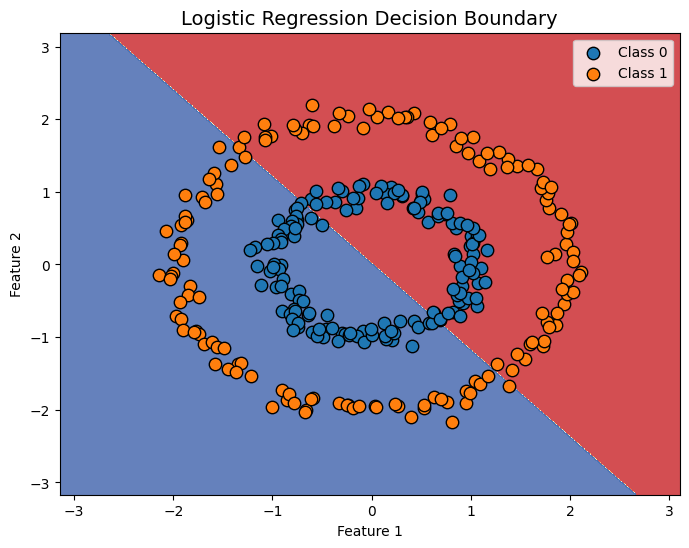

In [ ]:
# Logistic Regression Decision Boundary
plot_decision_boundary(log_reg, X, y, "Logistic Regression Decision Boundary")

# Fitting a Decision Tree on the Data

## Decision Tree: Handling Non-Linear Data

Unlike Logistic Regression, Decision Trees are capable of handling non-linear relationships in the data. They create hierarchical, piecewise decision boundaries by recursively splitting the feature space based on thresholds, allowing them to adapt to the complex circular structure of the rings dataset.

The code below demonstrates how we train a Decision Tree on the dataset and calculate its accuracy. The hierarchical splitting enables the Decision Tree to accurately classify the points in the non-linear dataset.

We will also visualize the decision boundary of the Decision Tree to showcase how it segments the feature space to fit the circular patterns of the data effectively.


## Introduction to the Decision Tree Implementation

The code provided is a custom implementation of a Decision Tree algorithm, designed to handle binary classification tasks. It is composed of two main components:

### **1. Node Class**
The `Node` class represents each node in the tree. Nodes can be either:
- **Leaf Nodes**: Store a class prediction and indicate the end of a branch in the tree.
- **Decision Nodes**: Store the feature index and threshold value used to split the data, along with references to left and right child nodes.

#### Key Features of the Node Class:
- **Attributes**:
  - `is_leaf`: Indicates whether the node is a leaf.
  - `prediction`: Stores the predicted class (for leaf nodes).
  - `feature` and `threshold`: Define the splitting criteria (for decision nodes).
- **Method**:
  - `predict`: Determines the class label for a given sample by traversing the tree.

---

### **2. DecisionTree Class**
The `DecisionTree` class implements the logic to build and traverse the decision tree.

#### Key Features of the DecisionTree Class:
- **Attributes**:
  - `max_depth`: Controls the depth of the tree to avoid overfitting.
  - `root`: Stores the root node of the tree.

- **Methods**:
  - `fit`: Builds the decision tree by recursively splitting the data based on information gain. Stops when stopping criteria are met (e.g., maximum depth is reached or data cannot be split further).
  - `predict`: Traverses the tree to predict labels for new samples.
  - `_build_tree`: Implements the recursive logic for creating the tree.
  - `_find_best_split`: Identifies the optimal feature and threshold to split the data.
  - `_entropy` and `_information_gain`: Calculate the metrics for splitting.
  - `_majority_class`: Determines the most common label for a given subset of data.

---

### **Usage**
1. **Training the Model**:
   The `fit` method is used to construct the tree using a training dataset (`X`, `y`).

2. **Making Predictions**:
   The `predict` method uses the tree structure to classify new data samples.

3. **Evaluating Performance**:
   The accuracy of the tree is calculated to measure its effectiveness in correctly classifying samples.

---

### **Summary**
This implementation provides a step-by-step approach to building a decision tree for binary classification. By incorporating key concepts such as entropy, information gain, and recursive splitting, this code serves as an excellent educational tool. It can also be extended for more complex scenarios or optimized for better performance.


---
<font color=green>Q1:</font>
<br><font color='green'>
Now that you understand the structure and working of the `DecisionTree` class, complete its implementation by filling in the blanks provided in the instructions below.
</font>  

---


## Instructions for Implementing the `DecisionTree`

Below are the detailed instructions for completing the blanks in the `DecisionTree` implementation.

---

#### **[1] `is_leaf_node` Method**
**Description**:  
This method checks if a node is a leaf. Leaf nodes indicate the end of a branch in the decision tree and contain a prediction value.

**Steps**:
1. Return the `is_leaf` attribute of the node.

**Pseudocode**:
```
return self.is_leaf
```

<details>
<summary>Click to see the solution</summary>

```python
return self.is_leaf
```

</details>

---

#### **[2] Return Prediction for Leaf Node**
**Description**:  
If the current node is a leaf, return the prediction value stored in the node.

**Steps**:
1. Return the `prediction` attribute of the node.

**Pseudocode**:
```
return self.prediction
```

<details>
<summary>Click to see the solution</summary>

```python
return self.prediction
```

</details>

---

#### **[3] Recursive Call for Left Child**
**Description**:  
Traverse the left child node if the feature value for the sample is less than the threshold.

**Steps**:
1. Recursively call the `predict` method on the left child.

**Pseudocode**:
```
return self.left.predict(sample)
```

<details>
<summary>Click to see the solution</summary>

```python
return self.left.predict(sample)
```

</details>

---

#### **[4] Recursive Call for Right Child**
**Description**:  
Traverse the right child node if the feature value for the sample is greater than or equal to the threshold.

**Steps**:
1. Recursively call the `predict` method on the right child.

**Pseudocode**:
```
return self.right.predict(sample)
```

<details>
<summary>Click to see the solution</summary>

```python
return self.right.predict(sample)
```

</details>

---

#### **[5] Initialize `DecisionTree`**
**Description**:  
Set up the DecisionTree object with a maximum depth and initialize the root as `None`.

**Steps**:
1. Assign `max_depth` to the corresponding attribute.
2. Initialize `root` as `None`.

**Pseudocode**:
```
self.max_depth = max_depth
self.root = None
```

<details>
<summary>Click to see the solution</summary>

```python
self.max_depth = max_depth
self.root = None
```

</details>

---

#### **[6] Build the Tree in `fit`**
**Description**:  
Call the `_build_tree` method to construct the tree.

**Steps**:
1. Call `_build_tree` with `X`, `y`, and initial depth `0`.
2. Assign the returned value to `self.root`.

**Pseudocode**:
```
self.root = self._build_tree(X, y, depth=0)
```

<details>
<summary>Click to see the solution</summary>

```python
self.root = self._build_tree(X, y, depth=0)
```

</details>

---

#### **[7] Predict Method**
**Description**:  
Iterate over all samples in `X` and predict their labels using the `predict` method of the root node.

**Steps**:
1. Use list comprehension to call `self.root.predict` for each sample.
2. Convert the results to a NumPy array.

**Pseudocode**:
```
return np.array([self.root.predict(sample) for sample in X])
```

<details>
<summary>Click to see the solution</summary>

```python
return np.array([self.root.predict(sample) for sample in X])
```

</details>

---

#### **[8] Create a Leaf Node**
**Description**:  
If stopping criteria are met, create a leaf node with the majority class prediction.

**Steps**:
1. Call `_majority_class` to determine the majority label.
2. Create a `Node` with `is_leaf=True` and the majority label.

**Pseudocode**:
```
return Node(is_leaf=True, prediction=self._majority_class(y))
```

<details>
<summary>Click to see the solution</summary>

```python
return Node(is_leaf=True, prediction=self._majority_class(y))
```

</details>

---

#### **[9] Compute Information Gain**
**Description**:  
Calculate the information gain for a given split.

**Steps**:
1. Use the `_information_gain` method with `y`, `y_left`, and `y_right`.

**Pseudocode**:
```
gain = self._information_gain(y, y_left, y_right)
```

<details>
<summary>Click to see the solution</summary>

```python
gain = self._information_gain(y, y_left, y_right)
```

</details>

---

#### **[10] Update Best Split**
**Description**:  
If the current gain is better than the previous best gain, update the best values.

**Steps**:
1. Update `best_gain`, `best_feature`, and `best_threshold`.

**Pseudocode**:
```
best_gain = gain
best_feature = feature
best_threshold = threshold
```

<details>
<summary>Click to see the solution</summary>

```python
best_gain = gain
best_feature = feature
best_threshold = threshold
```

</details>

---

#### **[11] Compute Information Gain in `_information_gain`**
**Description**:  
Calculate the reduction in entropy from splitting the data.

**Steps**:
1. Compute the weighted average entropy of the child nodes.
2. Subtract it from the parent node's entropy.

**Pseudocode**:
```
return self._entropy(y) - (p_left * self._entropy(y_left) + p_right * self._entropy(y_right))
```

<details>
<summary>Click to see the solution</summary>

```python
return self._entropy(y) - (p_left * self._entropy(y_left) + p_right * self._entropy(y_right))
```

</details>

---

#### **[12] Calculate Entropy**
**Description**:  
Calculate the entropy of the current node.

**Steps**:
1. Compute proportions of each label using `np.bincount`.
2. Use the entropy formula to calculate the result.

**Pseudocode**:
```
return -np.sum([p * np.log2(p) for p in proportions if p > 0])
```

<details>
<summary>Click to see the solution</summary>

```python
return -np.sum([p * np.log2(p) for p in proportions if p > 0])
```

</details>

---


In [ ]:
class Node:
    """
    Represents a single node in the decision tree.
    """
    def __init__(self, is_leaf=False, prediction=None, feature=None, threshold=None, left=None, right=None):
        """
        Initialize a Node object.

        Parameters:
        - is_leaf (bool): True if the node is a leaf node.
        - prediction (int or None): Class label if it's a leaf node.
        - feature (int or None): Index of the feature used for splitting.
        - threshold (float or None): Threshold value for splitting.
        - left (Node or None): Left child node.
        - right (Node or None): Right child node.
        """
        self.is_leaf = is_leaf
        self.prediction = prediction
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right

    def is_leaf_node(self):
        """
        Check if the current node is a leaf node.

        Returns:
        - bool: True if the node is a leaf, False otherwise.
        """
        ### Start your code here [1] ###
        return self.is_leaf
        ### End of code [1] ###

    def predict(self, sample):
        """
        Predict the class label for a single sample.

        Parameters:
        - sample (numpy.ndarray): A single feature vector (1D array).

        Returns:
        - int: Predicted class label.
        """
        if self.is_leaf:
            ### Start your code here [2] ###
            return self.prediction
            ### End of code [2] ###

        # Recursively traverse left or right subtree based on the feature value
        if sample[self.feature] < self.threshold:
            ### Start your code here [3] ###
            return self.left.predict(sample)
            ### End of code [3] ###
        else:
            ### Start your code here [4] ###
            return self.right.predict(sample)
            ### End of code [4] ###

class DecisionTree:
    """
    Custom implementation of a Decision Tree for binary classification.
    """
    def __init__(self, max_depth=None):
        """
        Initialize the DecisionTree object.

        Parameters:
        - max_depth (int or None): Maximum depth of the tree. None means unlimited depth.
        """
        ### Start your code here [5] ###
        self.max_depth = max_depth
        self.root = None
        ### End of code [5] ###

    def fit(self, X, y):
        """
        Build the decision tree using the training dataset.

        Parameters:
        - X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).
        - y (numpy.ndarray): Target labels of shape (n_samples,).

        Returns:
        - None: Tree structure is built and stored in self.root.
        """
        ### Start your code here [6] ###
        self.root = self._build_tree(X, y, depth=0)
        ### End of code [6] ###

    def predict(self, X):
        """
        Predict the labels for all samples in a dataset.

        Parameters:
        - X (numpy.ndarray): Feature matrix of shape (n_samples, n_features).

        Returns:
        - numpy.ndarray: Predicted labels for all samples.
        """
        ### Start your code here [7] ###
        return np.array([self.root.predict(sample) for sample in X])
        ### End of code [7] ###

    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree by splitting the data.

        Parameters:
        - X (numpy.ndarray): Feature matrix for the current node.
        - y (numpy.ndarray): Target labels for the current node.
        - depth (int): Current depth of the tree.

        Returns:
        - Node: Root node of the (sub)tree.
        """
        n_samples = len(y)
        n_labels = len(np.unique(y))

        # Stopping criteria: create a leaf node
        if n_labels == 1 or n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            ### Start your code here [8] ###
            return Node(is_leaf=True, prediction=self._majority_class(y))
            ### End of code [8] ###

        # Find the best feature and threshold to split the data
        feature, threshold, gain = self._find_best_split(X, y)
        if gain == 0:
            return Node(is_leaf=True, prediction=self._majority_class(y))

        # Split the dataset based on the chosen feature and threshold
        left_mask = X[:, feature] < threshold
        right_mask = ~left_mask

        # Recursively build left and right subtrees
        left_child = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        # Return a decision node
        return Node(is_leaf=False, feature=feature, threshold=threshold, left=left_child, right=right_child)

    def _find_best_split(self, X, y):
        """
        Find the best feature and threshold to split the data based on information gain.

        Parameters:
        - X (numpy.ndarray): Feature matrix.
        - y (numpy.ndarray): Target labels.

        Returns:
        - tuple: (best_feature, best_threshold, best_gain)
          - best_feature (int): Index of the feature with the best split.
          - best_threshold (float): Threshold value for the best split.
          - best_gain (float): Information gain from the best split.
        """
        best_gain = 0
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask

                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue

                ### Start your code here [9] ###
                gain = self._information_gain(y, y[left_mask], y[right_mask])
                ### End of code [9] ###

                if gain > best_gain:
                    ### Start your code here [10] ###
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
                    ### End of code [10] ###

        return best_feature, best_threshold, best_gain

    def _information_gain(self, y, y_left, y_right):
        """
        Compute the information gain for a split.

        Parameters:
        - y (numpy.ndarray): Original labels.
        - y_left (numpy.ndarray): Labels in the left subset.
        - y_right (numpy.ndarray): Labels in the right subset.

        Returns:
        - float: Information gain.
        """
        p_left = len(y_left) / len(y)
        p_right = 1 - p_left
        ### Start your code here [11] ###
        return self._entropy(y) - (p_left * self._entropy(y_left) + p_right * self._entropy(y_right))
        ### End of code [11] ###

    def _entropy(self, y):
        """
        Compute the entropy of a set of labels.

        Parameters:
        - y (numpy.ndarray): Target labels.

        Returns:
        - float: Entropy value.
        """
        if len(y) == 0:
            return 0

        proportions = np.bincount(y) / len(y)
        ### Start your code here [12] ###
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])
        ### End of code [12] ###

    def _majority_class(self, y):
        """
        Determine the majority class in a set of labels.

        Parameters:
        - y (numpy.ndarray): Target labels.

        Returns:
        - int: Majority class label.
        """
        return np.bincount(y).argmax()




In [ ]:
# Instantiate and train the decision tree
dec_tree = DecisionTree(max_depth=10)
dec_tree.fit(X, y)

# Predict using the decision tree
y_pred_tree = dec_tree.predict(X)

# Calculate accuracy
accuracy_tree = accuracy_score(y, y_pred_tree)

# Print Decision Tree accuracy

print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")

Decision Tree Accuracy: 1.00


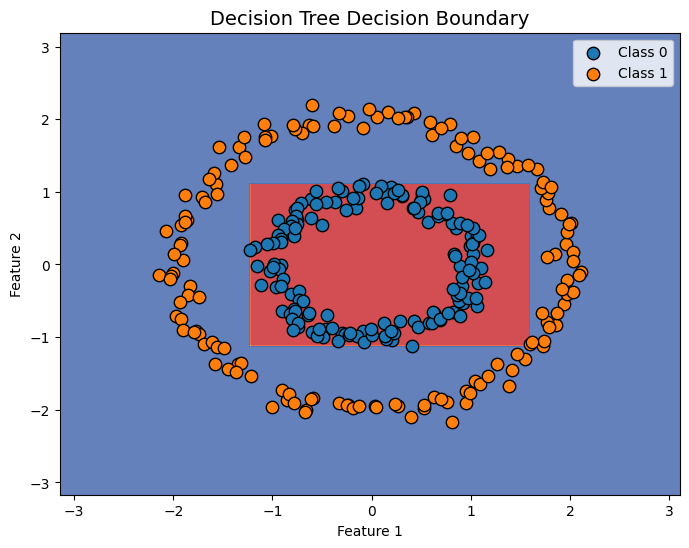

In [ ]:
# Logistic Regression Decision Boundary
plot_decision_boundary(dec_tree, X, y, "Decision Tree Decision Boundary")

### Contact

If you have any question regarding this notebook, do not hesitate to contact: h.madmoun@imperial.ac.uk